# Web Scraping Using Requests & BeautifulSoup - Hari Patchigolla

# Installation

In [ ]:
! pip install requests

In [ ]:
! pip install beautifulsoup4

# Importing Packages

In [1]:
import requests
from bs4 import BeautifulSoup as bs

# ```Requests```

## HTTP Get

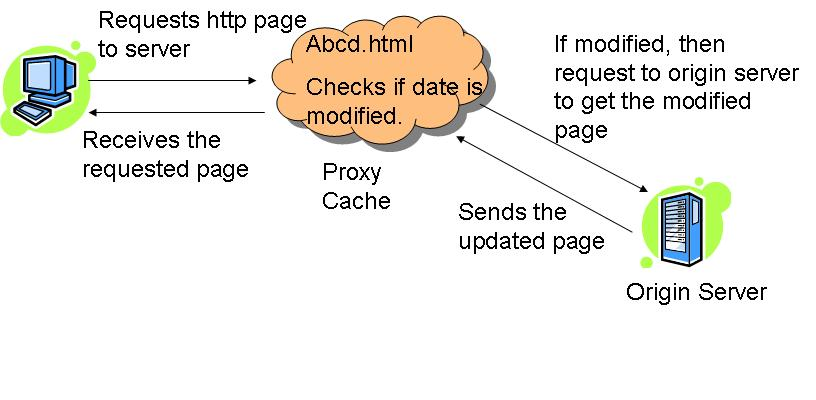

In [ ]:
response = requests.get("https://www.nfl.com/players/tom-brady/")

## Response

When you make a request you will always get an HTTP response, so lets see what this ```response``` variable is

In [ ]:
type(response)

In [ ]:
print(dir(response))

In [ ]:
response.status_code

In [ ]:
# print(response.content)

## Headers

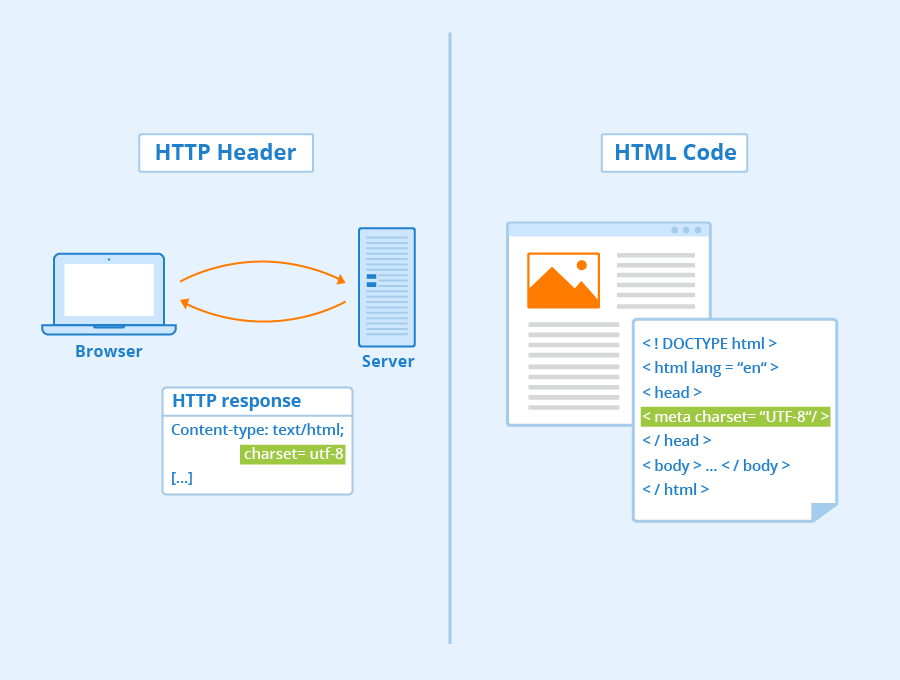

The response headers give you more detail on the reponse outside of the return content.

In [1]:
response.headers

NameError: name 'response' is not defined

## Extracting Data (Image)

Say that we want the image of Tom Brady, we can use ```requests``` to get this too. Simply find the image link in the html, request it, and store the content.

In [ ]:
tom_brady_img = requests.get("https://static.www.nfl.com/image/private/t_player_profile_landscape/f_auto/league/n7fj5fjblf6pdgjdtphr")
tom_brady_img.status_code

In [ ]:
with open("tombrady.jpg", 'wb') as img:
    img.write(tom_brady_img.content)

# ```BeautifulSoup```

Click here to view the documentation: [Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

Instead of looking through the HTML to find the data we want (the way we did to get the image of Tom Brady) we will use ```BeautifulSoup``` for this. As a result, only the ```requests.get()``` method is enough for our purposes since all we need in the HTML content.

Here are the steps we will follow in order every time we want to extract data:
1) Get the HTML content with a requests.get() command
2) Pass the HTML content into a BeautifulSoup object
3) Use CSS selector to identify parts of the webpage that have our data
4) Store the data


In [ ]:
soup = bs(response.content, 'html.parser')

In [ ]:
type(soup)

In [ ]:
# dir(soup)

#### Navigating the Parse Tree

To get a specific tag it is soup (tag name), but this only gets the first instance of that tag in the [parse tree](https://en.wikipedia.org/wiki/Parse_tree). We will get more to this in the "searching the tree section"

In [ ]:
soup.title

In [ ]:
soup.p

In [ ]:
type(soup.p)

In [ ]:
# dir(soup.p)

Many tags have nested tags within them, like this ```<a></a>``` tag

In [ ]:
soup.a

Accessing the ```<span></span>``` tag is simple

In [ ]:
soup.a.span

Notice how HTML Tag attributes are stored as a dictionary. So any operation we can do on a dictionary we can do to these attributes

In [ ]:
soup.a.attrs

In [ ]:
type(soup.a.attrs)

We can get the class name

In [ ]:
soup.a.attrs['class']

In [ ]:
soup.a['class']

In [ ]:
soup.a['href']

If there is a certain key-value pair that is not in the attributes we can add it the same way we would for a dictionary.

In [ ]:
soup.a['alt']

In [ ]:
soup.a['alt'] = "this is an a tag"

In [ ]:
soup.a['alt']

In [ ]:
soup.a

In [ ]:
soup.a.has_attr("alt")

A string corresponds to a bit of text within a tag. Beautiful Soup uses the NavigableString class to contain these bits of text


In [ ]:
soup.a.span

In [ ]:
soup.a.span.string

In [ ]:
type(soup.a.span.string)

In [ ]:
# dir(soup.a.span.string)

**IMPORTANT** - This ```.string``` command is what will let us read data from an HTML tag so this is what we will use to extract data. But, notice how in order to do this we first need to be able to locate the HTML tag. So, how do we actually select this data on the webpage?

```find_all()```

```select()```

You can use ```find_all``` to find elements from a certain query

In [ ]:
soup.find_all(True)

In [ ]:
soup.find_all('a')

Notice the return type


In [ ]:
a_lst = soup.find_all('a')
type(a_lst)

In [ ]:
a_lst[0], a_lst[-1]

You can serach for a tag based on a certain attribute

In [ ]:
soup.find_all('a', title="Privacy Policy")

You can also search for a tag based on if it contains a certain attribute

In [ ]:
soup.find_all('div', id=True)

You can also search with regular expressions (aka ```regex```) the ```re``` packae is built into Python and can be use to complie these expressions. Let's see how the ```find_all()``` methids takes advantage of this.

In [ ]:
import re

In [ ]:
def has_Buccaneers_in_string(tag):
    return tag and re.compile("Buccaneers").search(str(tag.string))

In [ ]:
soup.find_all(has_Buccaneers_in_string)

In [ ]:
def has_Buccaneers_in_string_P(tag):
    return tag.name == 'p' and re.compile("Buccaneers").search(str(tag.string))

In [ ]:
soup.find_all(has_Buccaneers_in_string_P)

Unfortunately ```regex``` can get quite complicated and but hard to learn. So as i mentioned we will be using CSS selectors. 

Chrome Dev tools give us an easy way to generate CSS Selectors for a webpage

In [ ]:
soup.select('#main-content > section:nth-child(5) > div > div.d3-l-col__col-8 > section > div > div > div > section > div > div.d3-l-col__col-12.nfl-c-player-info__content > ul.d3-o-list.nfl-c-player-info__physical-data > li:nth-child(2) > div.nfl-c-player-info__value')

The SelectorGadget in the Chrome Stores also gives you an neat way to generate CSS seletors. 

In [ ]:
brady_info = soup.select('.nfl-c-player-info__value')
brady_info

In [ ]:
# brady_info.string

Unfortuantely ```BeautifulSoup``` (to my knowledge at least) does not have a quick and easy way to extract the string from all the elemets stored ina list. So we have to use a for-loop.

In [ ]:
brady_info_lst = []
for tag in brady_info:
    brady_info_lst.append(tag.string)
brady_info_lst

In [ ]:
[tag.string for tag in brady_info]

In [10]:
def loop_through(tag):
    return tag.string 

In [ ]:
list(map(loop_through, brady_info))

In [ ]:
base_url = "https://www.nfl.com/"
add_on = "players/tom-brady/stats/"

brady_stats = requests.get(base_url + add_on)
print(brady_stats.status_code)
soup_stats = bs(brady_stats.text, 'html.parser')

In [ ]:
brady_2021_data = soup_stats.select("#main-content > section.nfl-t-stats.d3-l-grid--outer.d3-l-section-row > div > div:nth-child(4) > div > div.d3-o-table--horizontal-scroll > table > tbody > tr:nth-child(21)")
brady_2021_data
# main-content > section.nfl-t-stats.d3-l-grid--outer.d3-l-section-row > div > div:nth-child(4) > div > div.d3-o-table--horizontal-scroll > table > tbody > tr:nth-child(21)

In [ ]:
len(brady_2021_data)

In [ ]:
brady_2021_data[0]

In [ ]:
type(brady_2021_data[0])

In [ ]:
brady_2021_data[0].select('td')

In [ ]:
list(map(loop_through, brady_2021_data[0].select('td')))

# Making a Real Dataset

Now that you know the basics of ```BeautifulSoup``` lets make a dataset

In [2]:
base_url = "https://www.nfl.com/"
add_on = "stats/player-stats/category/passing/2021/reg/all/passingyards/DESC"

player_stats = requests.get(base_url + add_on)
print(player_stats.status_code)
soup_player_stats = bs(player_stats.text, 'html.parser') 

200


In [3]:
tbody_lst = soup_player_stats.select('#main-content > section.d3-l-grid--outer.d3-l-section-row > div > div > div > div > table > tbody')
# tbody_lst

In [4]:
len(tbody_lst)

1

In [5]:
tr_lst = tbody_lst[0].select('tr')
len(tr_lst)

25

In [6]:
td_lst = tr_lst[0].select('td')
td_lst

[<td scope="row" tabindex="0"><div class="d3-o-media-object d3-o-media-object--vertical-center"><figure class="d3-o-media-object__figure d3-o-player-headshot"><picture is-lazy="/t_lazy"><!--[if IE 9]><video style="display:none"><![endif]--><source media="(min-width:1024px)" srcset="https://static.www.nfl.com/image/private/t_headshot_desktop/t_lazy/f_auto/league/q7dpdlxyu5rs05rgh1le 1x, https://static.www.nfl.com/image/private/t_headshot_desktop_2x/t_lazy/f_auto/league/q7dpdlxyu5rs05rgh1le 2x, https://static.www.nfl.com/image/private/t_headshot_desktop_3x/t_lazy/f_auto/league/q7dpdlxyu5rs05rgh1le"/><source media="(min-width:768px)" srcset="https://static.www.nfl.com/image/private/t_headshot_tablet/t_lazy/f_auto/league/q7dpdlxyu5rs05rgh1le 1x, https://static.www.nfl.com/image/private/t_headshot_tablet_2x/t_lazy/f_auto/league/q7dpdlxyu5rs05rgh1le 2x, https://static.www.nfl.com/image/private/t_headshot_tablet_3x/t_lazy/f_auto/league/q7dpdlxyu5rs05rgh1le"/><source srcset="https://static.www

In [7]:
td_lst[1:]

[<td class="selected">5316</td>,
 <td>7.4</td>,
 <td>719</td>,
 <td>485</td>,
 <td>67.4</td>,
 <td>43</td>,
 <td>12</td>,
 <td>102.1</td>,
 <td>269</td>,
 <td>37.4</td>,
 <td>75</td>,
 <td>10</td>,
 <td>62</td>,
 <td>22</td>,
 <td>144</td>]

In [8]:
td_lst[0].a.string

' Tom Brady '

In [11]:
for players in tr_lst:
    print(players.select('td')[0].a.string, list(map(loop_through, players.select('td')[1:])))

 Tom Brady  ['5316', '7.4', '719', '485', '67.4', '43', '12', '102.1', '269', '37.4', '75', '10', '62', '22', '144']
 Justin Herbert  ['5014', '7.5', '672', '443', '65.9', '38', '15', '97.7', '256', '38.1', '53', '15', '72', '31', '214']
 Matthew Stafford  ['4886', '8.1', '601', '404', '67.2', '41', '17', '102.9', '233', '38.8', '65', '18', '79', '30', '243']
 Patrick Mahomes  ['4839', '7.4', '658', '436', '66.3', '37', '13', '98.4', '260', '39.5', '58', '11', '75', '28', '146']
 Derek Carr  ['4804', '7.7', '626', '428', '68.4', '23', '14', '94', '217', '34.7', '67', '10', '61', '40', '241']
 Joe Burrow  ['4611', '8.9', '520', '366', '70.4', '34', '14', '108.3', '202', '38.8', '60', '15', '82', '51', '370']
 Dak Prescott  ['4449', '7.5', '596', '410', '68.8', '37', '10', '104.2', '227', '38.1', '55', '7', '51', '30', '144']
 Josh Allen  ['4407', '6.8', '646', '409', '63.3', '36', '15', '92.2', '234', '36.2', '51', '8', '61', '26', '164']
 Kirk Cousins  ['4221', '7.5', '561', '372', '66

In [12]:
td_lst[0].a['href']

'/players/tom-brady/'

In [24]:
for players in tr_lst: #.nfl-c-player-info__value
    base_url = "https://www.nfl.com"
    add_on = players.select('td')[0].a['href']
    temp_player_stats = requests.get(base_url + add_on)
    temp_soup_player_stats = bs(temp_player_stats.text, 'html.parser')
    print(players.select('td')[0].a.string, list(map(loop_through, temp_soup_player_stats.select('.nfl-c-player-info__value'))))

 Tom Brady  ['6-4', '225', None, None, '23', 'Michigan', '45', None]
 Justin Herbert  ['6-6', '236', '33', '10', '3', 'Oregon', '24', 'Eugene, OR']
 Matthew Stafford  ['6-3', '220', '33 1/4', '10', '14', 'Georgia', '34', None]
 Patrick Mahomes  ['6-2', '225', '33 1/4', '9 1/4', '6', 'Texas Tech', '27', None]
 Derek Carr  ['6-3', '210', '31 1/2', '9 1/4', '9', 'Fresno State', '31', None]
 Joe Burrow  ['6-4', '215', '31', '9', '3', 'LSU', '25', 'Athens, OH']
 Dak Prescott  ['6-2', '238', '32 1/4', '10', '7', 'Mississippi State', '29', None]
 Josh Allen  ['6-5', '237', '33 1/4', '10 1/4', '5', 'Wyoming', '26', 'Firebaugh, CA']
 Kirk Cousins  ['6-3', '205', '31 3/4', '10', '11', 'Michigan State', '34', None]
 Aaron Rodgers  ['6-2', '225', None, None, '18', 'California', '38', None]
 Matt Ryan  ['6-4', '220', '32 3/4', '9 1/2', '15', 'Boston College', '37', 'Exton, PA']
 Jimmy Garoppolo  ['6-2', '225', '31', '9 1/4', '9', 'Eastern Illinois', '30', None]
 Mac Jones  ['6-3', '217', '32 3/4', 

In [13]:
import pandas as pd

In [14]:
player_name = []
player_height = []
player_weight = []
player_arms = []
player_hands = []
player_exp = []
player_college = []
player_age = []
player_hometown = []
Pass_Yds = []
Yds_Att = []
Att = []
Cmp = []
Cmp_per = []
TD = []
INT = []
Rate = []
_1st = []
_1st_per = []
_20_plus = []
_40_plus = []
Lng = []
Sck = []
SckY = []

In [15]:
for players in tr_lst:
    p_name = players.select('td')[0].a.string
    print(p_name)
    player_name.append(p_name)
    stats_1st = list(map(loop_through, players.select('td')[1:]))
    Pass_Yds.append(stats_1st[0]) 
    Yds_Att.append(stats_1st[1]) 
    Att.append(stats_1st[2])
    Cmp.append(stats_1st[3]) 
    Cmp_per.append(stats_1st[4])
    TD.append(stats_1st[5]) 
    INT.append(stats_1st[6]) 
    Rate.append(stats_1st[7]) 
    _1st.append(stats_1st[8]) 
    _1st_per.append(stats_1st[9]) 
    _20_plus.append(stats_1st[10])
    _40_plus.append(stats_1st[11]) 
    Lng.append(stats_1st[12]) 
    Sck.append(stats_1st[13])
    SckY.append(stats_1st[14])
    
    base_url = "https://www.nfl.com"
    add_on = players.select('td')[0].a['href']
    temp_player_stats = requests.get(base_url + add_on)
    temp_soup_player_stats = bs(temp_player_stats.text, 'html.parser')
    
   
    player_info = list(map(loop_through, temp_soup_player_stats.select('.nfl-c-player-info__value'))) 
    player_height.append(player_info[0]) 
    player_weight.append(player_info[1]) 
    player_arms.append(player_info[2]) 
    player_hands.append(player_info[3]) 
    player_exp.append(player_info[4]) 
    player_college.append(player_info[5]) 
    player_age.append(player_info[6]) 
    if p_name.strip() == "Ben Roethlisberger":
        player_hometown.append(None) 
    else:
        player_hometown.append(player_info[7]) 

 Tom Brady 
 Justin Herbert 
 Matthew Stafford 
 Patrick Mahomes 
 Derek Carr 
 Joe Burrow 
 Dak Prescott 
 Josh Allen 
 Kirk Cousins 
 Aaron Rodgers 
 Matt Ryan 
 Jimmy Garoppolo 
 Mac Jones 
 Kyler Murray 
 Ben Roethlisberger 
 Ryan Tannehill 
 Trevor Lawrence 
 Carson Wentz 
 Taylor Heinicke 
 Jared Goff 
 Jalen Hurts 
 Russell Wilson 
 Teddy Bridgewater 
 Baker Mayfield 
 Lamar Jackson 


In [16]:
data= {
    "player_name" : player_name,
    "player_height" : player_height,
    "player_weight" : player_weight,
    "player_arms" : player_arms,
    "player_hands" : player_hands,
    "player_exp" : player_exp,
    "player_college" : player_college,
    "player_age" : player_age,
    "player_hometown" : player_hometown,
    "Pass_Yds" : Pass_Yds,
    "Yds_Att" : Yds_Att,
    "Att" : Att,
    "Cmp" : Cmp,
    "Cmp_per" : Cmp_per,
    "TD" : TD,
    "INT" : INT,
    "Rate" : Rate,
    "_1st" : _1st,
    "_1st_per" : _1st_per,
    "_20_plus" : _20_plus,
    "_40_plus" : _40_plus,
    "Lng" : Lng,
    "Sck" : Sck,
    "SckY" : SckY
}

In [17]:
df = pd.DataFrame(data = data)

In [18]:
df

,player_name,player_height,player_weight,player_arms,player_hands,player_exp,player_college,player_age,player_hometown,Pass_Yds,...,TD,INT,Rate,_1st,_1st_per,_20_plus,_40_plus,Lng,Sck,SckY
0,Tom Brady,6-4,225,None,None,23,Michigan,45,None,5316,...,43,12,102.1,269,37.4,75,10,62,22,144
1,Justin Herbert,6-6,236,33,10,3,Oregon,24,"Eugene, OR",5014,...,38,15,97.7,256,38.1,53,15,72,31,214
2,Matthew Stafford,6-3,220,33 1/4,10,14,Georgia,34,None,4886,...,41,17,102.9,233,38.8,65,18,79,30,243
3,Patrick Mahomes,6-2,225,33 1/4,9 1/4,6,Texas Tech,27,None,4839,...,37,13,98.4,260,39.5,58,11,75,28,146
4,Derek Carr,6-3,210,31 1/2,9 1/4,9,Fresno State,31,None,4804,...,23,14,94,217,34.7,67,10,61,40,241
5,Joe Burrow,6-4,215,31,9,3,LSU,25,"Athens, OH",4611,...,34,14,108.3,202,38.8,60,15,82,51,370
6,Dak Prescott,6-2,238,32 1/4,10,7,Mississippi State,29,None,4449,...,37,10,104.2,227,38.1,55,7,51,30,144
7,Josh Allen,6-5,237,33 1/4,10 1/4,5,Wyoming,26,"Firebaugh, CA",4407,...,36,15,92.2,234,36.2,51,8,61,26,164
8,Kirk Cousins,6-3,205,31 3/4,10,11,Michigan State,34,None,4221,...,33,7,103.1,192,34.2,60,10,64,28,197
9,Aaron Rodgers,6-2,225,None,None,18,California,38,None,4115,...,37,4,111.9,213,40.1,55,10,75,30,188


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      25 non-null     object
 1   player_height    25 non-null     object
 2   player_weight    25 non-null     object
 3   player_arms      21 non-null     object
 4   player_hands     21 non-null     object
 5   player_exp       25 non-null     object
 6   player_college   25 non-null     object
 7   player_age       24 non-null     object
 8   player_hometown  10 non-null     object
 9   Pass_Yds         25 non-null     object
 10  Yds_Att          25 non-null     object
 11  Att              25 non-null     object
 12  Cmp              25 non-null     object
 13  Cmp_per          25 non-null     object
 14  TD               25 non-null     object
 15  INT              25 non-null     object
 16  Rate             25 non-null     object
 17  _1st             25 non-null     obje

In [20]:
df.to_csv("top_25_nfl_QBs.csv")